# Import Selenium and Web Manager

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


# Import other libraries and Packages

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import urllib.request
from PIL import Image
from selenium.webdriver.common.by import By
from selenium import webdriver
import time

# Load the website

In [60]:
try:
    begin = time.time()
    options = webdriver.ChromeOptions()
    options.add_argument('-headless')
    s=Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=s,options=options)
    driver.get('https://myaadhaar.uidai.gov.in/verifyAadhaar')
except:
    print("Found Error!")
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\adityatomar\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


# Time taken to load

In [61]:
end = time.time()
print(end-begin)

8.46260404586792


# Enter Aadhar Number

In [62]:
aadhar_no = driver.find_element(by=By.XPATH, value='/html/body/div[1]/div/div[3]/div/div/div[1]/div/form/div/div[1]/div/div/div/input')
aadhar_nos = driver.find_element(by=By.XPATH, value = '/html/body/div[1]/div/div[3]/div/div/div[1]/div/form/div/div[2]/div[2]/img')
aadhar_no1 = driver.find_element(by=By.XPATH, value= '/html/body/div[1]/div/div[3]/div/div/div[1]/div/form/div/div[2]/div[1]/div/div/div/input')
aadhar_no.send_keys('861807950586')

# Wait for Captcha

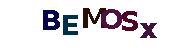

In [64]:
value = aadhar_nos.get_attribute('src')
urllib.request.urlretrieve(value , "check.png")
img = Image.open("check.png")
img

# Enter Captcha

In [65]:
aadhar_no1.send_keys('BEMOSx')

In [66]:
aadhar_no2 = driver.find_element(by=By.CLASS_NAME, value = 'button_btn__1dRFj')
aadhar_no2.click()

# Aadhar card exist or not

In [67]:
try:
    checkss = driver.find_element(by=By.CLASS_NAME,value ='verify-aadhaar-response__cong')
    print(checkss.text)
except:
    print("Aadhar is not Exists")

861807950586 Exists


# Final XML 

In [68]:
from bs4 import BeautifulSoup
html  = driver.page_source
soup = BeautifulSoup(html, 'xml')
print(soup)
driver.close()

<?xml version="1.0" encoding="utf-8"?>
<html id="html" lang="en"><head><meta charset="utf-8"><link href="/favicon.ico" rel="icon"><meta content="width=device-width,initial-scale=1" name="viewport"><meta content="#000000" name="theme-color"><meta content="One portal for all online Aadhaar Services." name="description"><link href="/resources/css/style.css" rel="stylesheet"><link href="https://fonts.gstatic.com" rel="preconnect"><link href="https://fonts.googleapis.com/css2?family=Roboto:ital,wght@0,100;0,300;0,400;0,500;0,700;0,900;1,100;1,300;1,400;1,500;1,700;1,900&amp;display=swap" rel="stylesheet"><link crossorigin="" href="https://unpkg.com/leaflet@1.7.1/dist/leaflet.css" integrity="sha512-xodZBNTC5n17Xt2atTPuE1HxjVMSvLVW9ocqUKLsCC5CXdbqCmblAshOMAS6/keqq/sMZMZ19scR4PsZChSR7A==" rel="stylesheet"><script crossorigin="" integrity="sha512-XQoYMqMTK8LvdxXYG3nZ448hOEQiglfqkJs1NOQV44cWnUrBc8PkAOcXy20w0vlaXaVUearIOBhiXZ5V3ynxwA==" src="https://unpkg.com/leaflet@1.7.1/dist/leaflet.js"/><scri